<a href="https://colab.research.google.com/github/NelisLima/MVP/blob/main/MVP_An%C3%A1lise_Explorat%C3%B3ria_e_Pr%C3%A9_Processamento_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP Sprint: Análise de Dadoas e Boas Práticas

# Análise Eploratória

Objetivo: Realizar análise exploratória e pré processamento de dados em conjunto de dados sobre crimes em Los Angeles

Dataset utilizado:
Crime_Data_from_2020_to_Present (https://www.kaggle.com/datasets/nathaniellybrand/los-angeles-crime-dataset-2020-present/data)

**Checklist sugerida:**

Qual é a descrição do problema?
Realizar análise exploratória e pré processamento de dados em conjunto de dados sobre crimes em Los Angeles. Afim de construir um modelo a predizer a quantidade de crimes por área, sexo e idade das vítimas. O período de predição deve ser feito em até 1 ano a partir da última data do dataset.

Este é um problema de aprendizado supervisionado ou não supervisionado?
Caso fosse feito um modelo, seria supervisionado.

Que premissas ou hipóteses você tem sobre o problema?
Será preciso fazer limpeza no dataset, na etapa de pré-processamento.

Que restrições ou condições foram impostas para selecionar os dados?
Em relação ao conjunto de dados, procurei um  base bem robusta, para que pudesse realizar várias limpezas e também termos muitas informações, para contribuir na construção do modelo (caso fosse feita a construção)

Defina cada um dos atributos do dataset.

DATE OCC (Data de Ocorrência),
AREA NAME (Área de Ocorrência),
Vict Age (Idade do Vítima),
Vict Sex (Sexo da Vítima)

Os atributos acima escolhidos, são o suficentes para realizar uma análise exploratória e entender comportamento, evolução dos crimes e construção do modelo desejado.

'''

In [787]:
# Importando bibliotecas a serem utilizadas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

df_crimes = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [788]:
# Quantos atributos e instâncias existem?

df_crimes.shape

(752911, 28)

In [789]:
# Quais são os tipos de dados dos atributos?

df_crimes.dtypes

,0
DR_NO,int64
Date Rptd,object
DATE OCC,object
TIME OCC,int64
AREA,int64
AREA NAME,object
Rpt Dist No,int64
Part 1-2,int64
Crm Cd,int64
Crm Cd Desc,object


In [790]:
# Verifique as primeiras linhas do dataset. Algo chama a atenção?
# Sim, nas primeiras linhas, foi possível observar que em determinados atributos, temos valores ausentes.

pd.set_option('display.max_columns', None)
df_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [791]:
# Há valores faltantes, discrepantes ou inconsistentes?
# Sim, é preciso fazer conversão do tipo de coluna, como por exemplo DATE OCC, ela tem que ser do tipo Date, mas está como object.

df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752911 entries, 0 to 752910
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           752911 non-null  int64  
 1   Date Rptd       752911 non-null  object 
 2   DATE OCC        752911 non-null  object 
 3   TIME OCC        752911 non-null  int64  
 4   AREA            752911 non-null  int64  
 5   AREA NAME       752911 non-null  object 
 6   Rpt Dist No     752911 non-null  int64  
 7   Part 1-2        752911 non-null  int64  
 8   Crm Cd          752911 non-null  int64  
 9   Crm Cd Desc     752911 non-null  object 
 10  Mocodes         649650 non-null  object 
 11  Vict Age        752911 non-null  int64  
 12  Vict Sex        654681 non-null  object 
 13  Vict Descent    654675 non-null  object 
 14  Premis Cd       752902 non-null  float64
 15  Premis Desc     752476 non-null  object 
 16  Weapon Used Cd  261472 non-null  float64
 17  Weapon Des

In [792]:
# exibindo os nomes das colunas

df_crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [793]:
# Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?
# Notei que será preciso fazer tratamento de determinadas colunas, pois possuem número negativo (idade, como exemplo), e há variável que pode ser mudada para string, pois não faz sentido fazer resumo estatístico (DR_NO)

df_crimes.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,7.529110e+05,752911.000000,752911.000000,752911.000000,752911.000000,752911.000000,752911.000000,752902.000000,261472.000000,752901.000000,55707.000000,1867.000000,56.000000,752911.000000,752911.000000
mean,2.147860e+08,1334.819522,10.717709,1118.176904,1.415733,500.887534,29.917438,305.961031,362.587183,500.628462,957.243758,983.637922,990.232143,33.970994,-117.997822
std,1.028819e+07,653.789438,6.092023,609.213814,0.492848,207.980041,21.730057,216.813311,123.718159,207.770351,111.905237,51.420326,28.834317,1.869766,6.483999
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.021116e+08,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429500
50%,2.119101e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321400
75%,2.215044e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163000,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


array([[<Axes: title={'center': 'DR_NO'}>,
        <Axes: title={'center': 'TIME OCC'}>,
        <Axes: title={'center': 'AREA'}>,
        <Axes: title={'center': 'Rpt Dist No'}>],
       [<Axes: title={'center': 'Part 1-2'}>,
        <Axes: title={'center': 'Crm Cd'}>,
        <Axes: title={'center': 'Vict Age'}>,
        <Axes: title={'center': 'Premis Cd'}>],
       [<Axes: title={'center': 'Weapon Used Cd'}>,
        <Axes: title={'center': 'Crm Cd 1'}>,
        <Axes: title={'center': 'Crm Cd 2'}>,
        <Axes: title={'center': 'Crm Cd 3'}>],
       [<Axes: title={'center': 'Crm Cd 4'}>,
        <Axes: title={'center': 'LAT'}>, <Axes: title={'center': 'LON'}>,
        <Axes: >]], dtype=object)

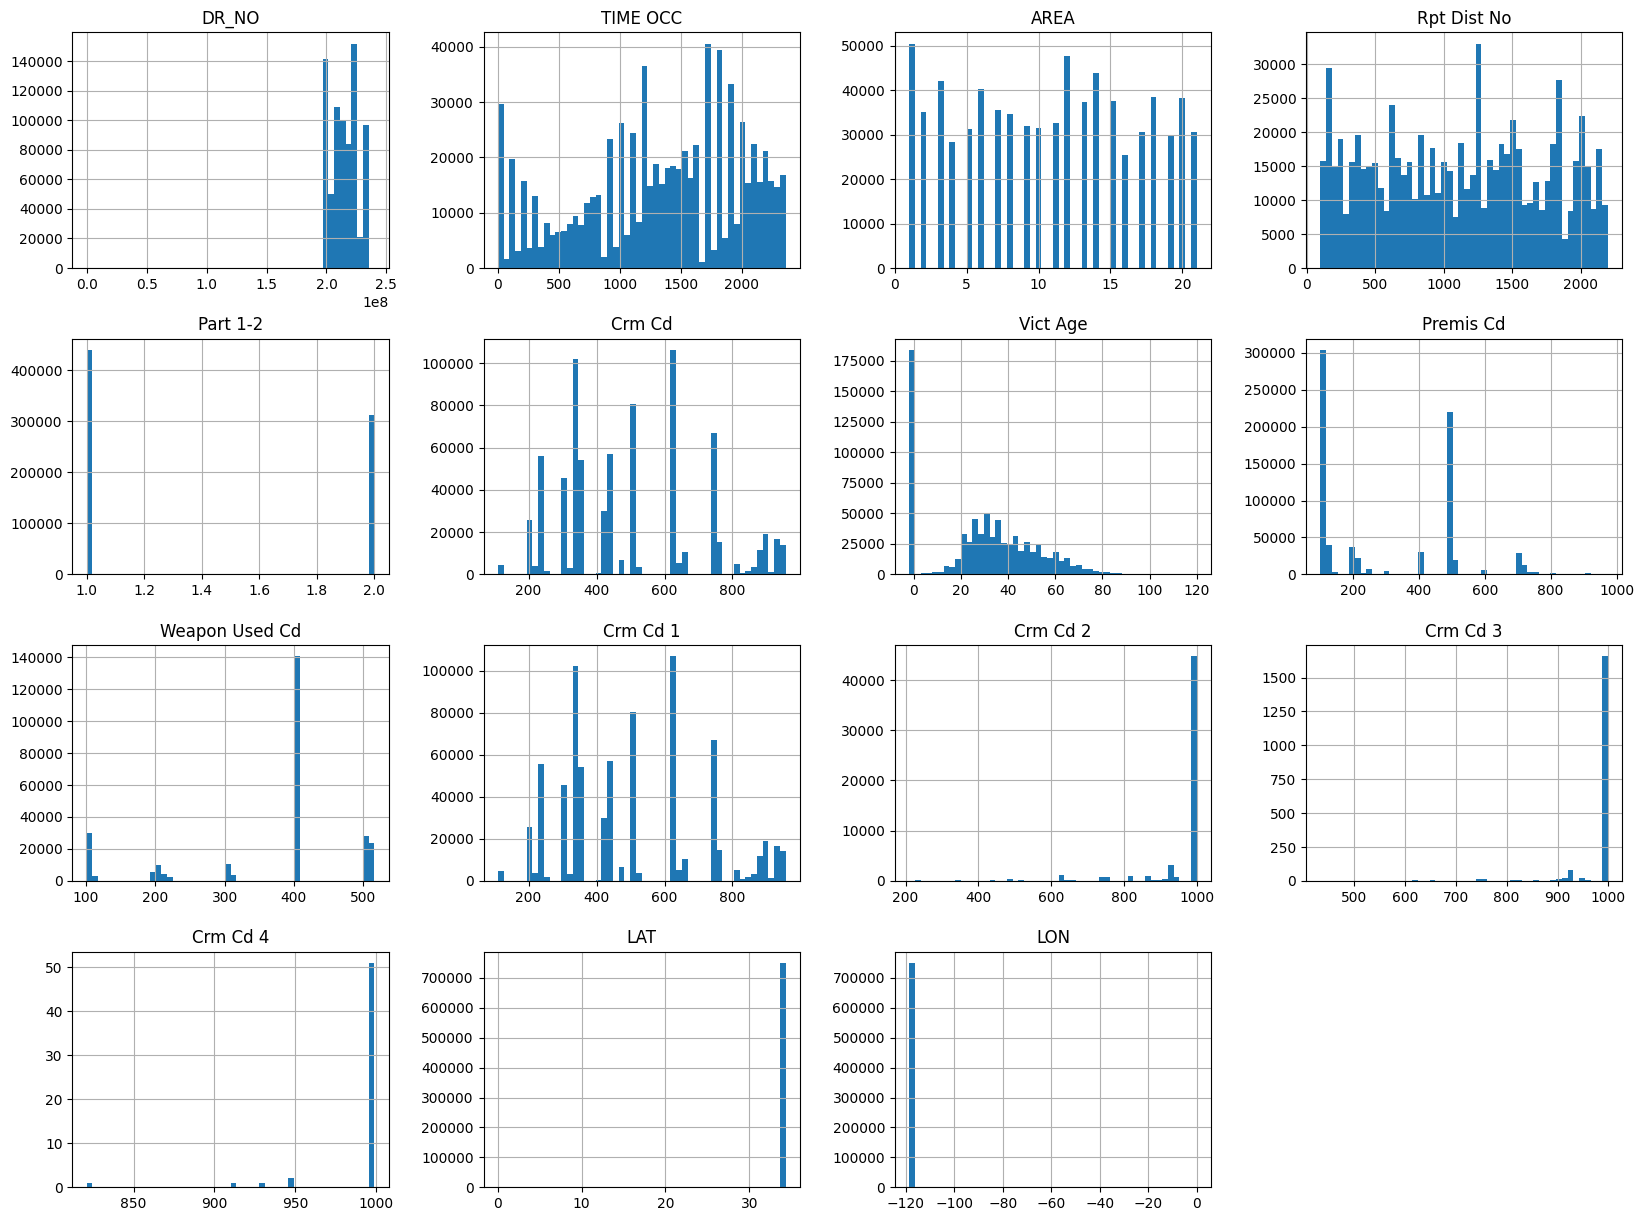

In [794]:
# Verifique a distribuição de cada atributo. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).
# Notei que o atributo Vict Age, que será utilizada, possui um valor incorreto

df_crimes.hist(bins=50, figsize=(20,15))

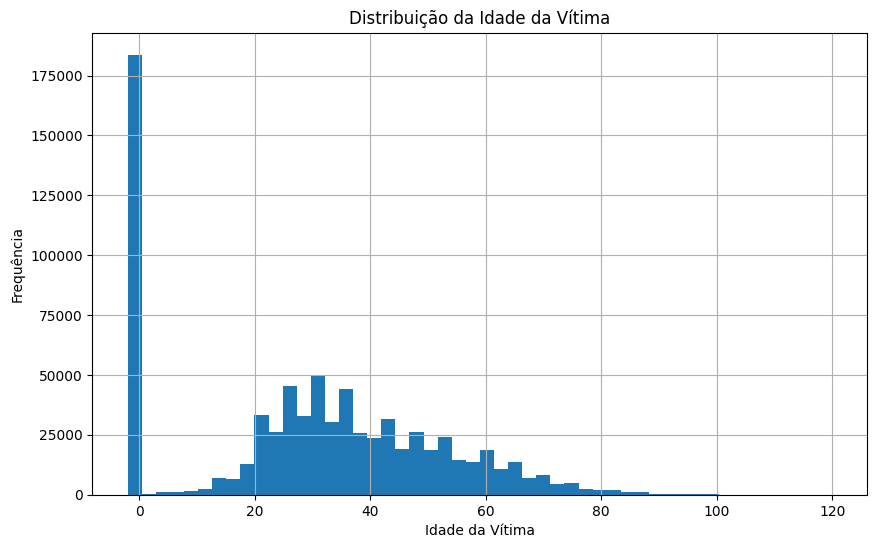

In [795]:
plt.figure(figsize=(10, 6))
df_crimes['Vict Age'].hist(bins=50)
plt.xlabel('Idade da Vítima')
plt.ylabel('Frequência')
plt.title('Distribuição da Idade da Vítima')
plt.show()

In [796]:
# Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.
# A classe sexo, está com sujeira e há um desbalancemento mas não tão expressivo entre masculino e feminino

df_crimes['Vict Sex'].value_counts()

,count
Vict Sex,
M,311959
F,278272
X,64363
H,86
-,1


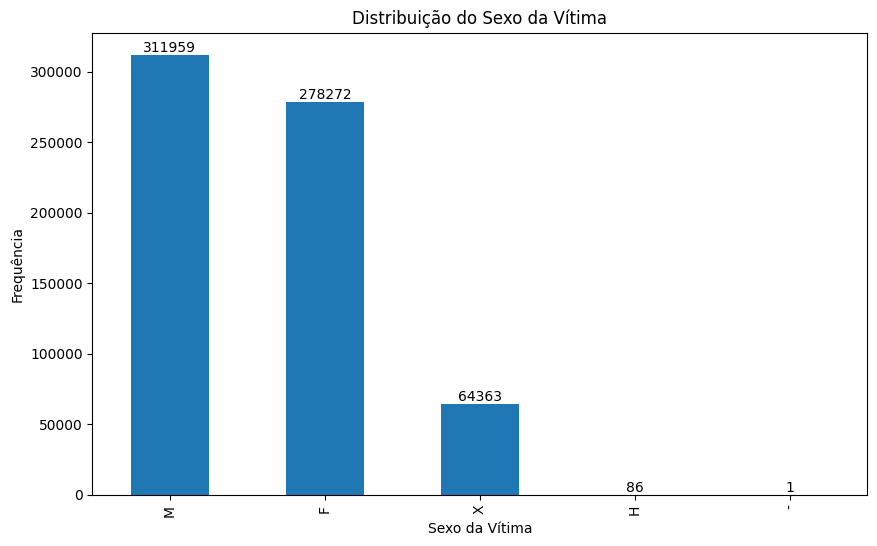

In [797]:
# Conforme dito anteriormente, será preciso ajustar esse atributo

plt.figure(figsize=(10, 6))
df_crimes['Vict Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sexo da Vítima')
plt.ylabel('Frequência')
plt.title('Distribuição do Sexo da Vítima')

# Adicionando rótulos nas barras
for i, v in enumerate(df_crimes['Vict Sex'].value_counts()):
  plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()


In [798]:
# O atributo abaixo parece estar bem limpo, não detectei nenhuma divergência ou necessidade de limpeza.

df_area_count = df_crimes.groupby('AREA NAME')['DR_NO'].count().sort_values(ascending=False)
df_area_count

,DR_NO
AREA NAME,
Central,50499
77th Street,47682
Pacific,43880
Southwest,42061
Hollywood,40184
Southeast,38577
Olympic,38197
N Hollywood,37474
Newton,37430


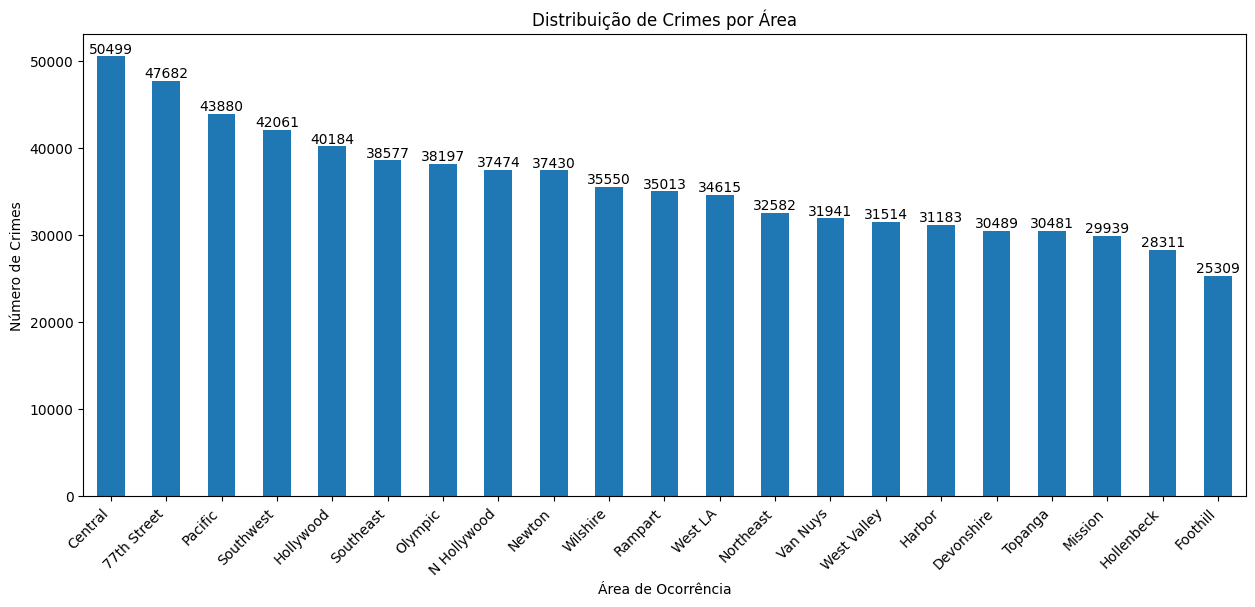

In [799]:
# Analisando a quantidade de crimes para cada área, aparentemente há uma boa distribuição de forma geral.

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
df_area_count.plot(kind='bar')
plt.xlabel('Área de Ocorrência')
plt.ylabel('Número de Crimes')
plt.title('Distribuição de Crimes por Área')
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos nas barras
for i, v in enumerate(df_area_count):
  plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()


In [800]:
# Analisando o atributo abaixo, foi identificado que por padrão, colocaram 12 horas, será feita a remoção, e para o nosso estudo, será utulizada apenas a data.

sorted(df_crimes['DATE OCC'].unique())

['01/01/2020 12:00:00 AM',
 '01/01/2021 12:00:00 AM',
 '01/01/2022 12:00:00 AM',
 '01/01/2023 12:00:00 AM',
 '01/02/2020 12:00:00 AM',
 '01/02/2021 12:00:00 AM',
 '01/02/2022 12:00:00 AM',
 '01/02/2023 12:00:00 AM',
 '01/03/2020 12:00:00 AM',
 '01/03/2021 12:00:00 AM',
 '01/03/2022 12:00:00 AM',
 '01/03/2023 12:00:00 AM',
 '01/04/2020 12:00:00 AM',
 '01/04/2021 12:00:00 AM',
 '01/04/2022 12:00:00 AM',
 '01/04/2023 12:00:00 AM',
 '01/05/2020 12:00:00 AM',
 '01/05/2021 12:00:00 AM',
 '01/05/2022 12:00:00 AM',
 '01/05/2023 12:00:00 AM',
 '01/06/2020 12:00:00 AM',
 '01/06/2021 12:00:00 AM',
 '01/06/2022 12:00:00 AM',
 '01/06/2023 12:00:00 AM',
 '01/07/2020 12:00:00 AM',
 '01/07/2021 12:00:00 AM',
 '01/07/2022 12:00:00 AM',
 '01/07/2023 12:00:00 AM',
 '01/08/2020 12:00:00 AM',
 '01/08/2021 12:00:00 AM',
 '01/08/2022 12:00:00 AM',
 '01/08/2023 12:00:00 AM',
 '01/09/2020 12:00:00 AM',
 '01/09/2021 12:00:00 AM',
 '01/09/2022 12:00:00 AM',
 '01/09/2023 12:00:00 AM',
 '01/10/2020 12:00:00 AM',
 

# Pré-Processamento

In [801]:
df_crimes_trat = df_crimes.copy()

In [802]:
# Selecionando apenas atributos interessantes para a nossa análise

df_crimes_trat = df_crimes_trat[['DATE OCC', 'AREA NAME', 'Vict Age', 'Vict Sex']]

In [803]:
# Verificando novamente quantidade de atributos e instâncias
df_crimes_trat.shape

(752911, 4)

In [804]:
# Verificando tipo dos atributos para ajuste

df_crimes_trat.dtypes

,0
DATE OCC,object
AREA NAME,object
Vict Age,int64
Vict Sex,object


In [805]:
# Transformando para o tipo date e verificando o período das datas

df_crimes_trat['DATE OCC'] = pd.to_datetime(df_crimes_trat['DATE OCC'])

print(f"Mínimo da coluna DATE OCC: {df_crimes_trat['DATE OCC'].min()}")
print(f"Máximo da coluna DATE OCC: {df_crimes_trat['DATE OCC'].max()}")

# O atributo DATE OCC se encontra dentro do padrão

Mínimo da coluna DATE OCC: 2020-01-01 00:00:00
Máximo da coluna DATE OCC: 2023-07-03 00:00:00


In [806]:
# Visão geral das idades

age_counts = df_crimes_trat['Vict Age'].value_counts()
age_counts_sorted = age_counts.sort_index()
total_count = age_counts_sorted.sum()
age_counts_sorted_percentage = (age_counts_sorted / total_count) * 100
age_counts_df = pd.DataFrame({'Count': age_counts_sorted, 'Percentage': age_counts_sorted_percentage})
age_counts_df


,Count,Percentage
Vict Age,,
-2,11,0.001461
-1,48,0.006375
0,183654,24.392524
2,334,0.044361
3,389,0.051666
4,407,0.054057
5,461,0.061229
6,453,0.060166
7,476,0.063221


In [807]:
# Removendo idades negativas e inferior a 0 anos, pois não existe idade negativa e são poucos registros

df_crimes_trat = df_crimes_trat[df_crimes_trat['Vict Age'] >= 0]

In [808]:
# Levando em consideração que a expectativa de vida nos estados unidos é de 77 anos no período do dataset (pesquisa feita o google), o que for acima disso, será considerado como insistente e tratado
# Link da pesquisa: https://www.terra.com.br/vida-e-estilo/eua-expectativa-de-vida-cai-e-saude-do-homem-preocupa,d73f9e4a2ab348125948d38af56699d3cwyksyuq.html#:~:text=A%20expectativa%20de%20vida%20nos,do%20IBGE%20relativos%20a%202021.
# Idade com 0, também será tratado

# Lista de números a serem substituídos por None
numbers_to_replace = list(range(77, 121))

# Substituindo os números por None na coluna 'Vict Age'
df_crimes_trat['Vict Age'].replace(numbers_to_replace, None, inplace=True)
# Substituindo 0 por None
df_crimes_trat['Vict Age'].replace(0, None, inplace=True)


In [809]:
# Visualizando percentual desses valores inconsistentes em relação ao total

def missing_percentage(df, column_name):
  """
  Calculate the percentage of missing values in a specific column of a DataFrame.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column to analyze.

  Returns:
    A float representing the percentage of missing values in the column.
  """
  total_rows = len(df)
  missing_rows = df[column_name].isnull().sum()
  percentage = (missing_rows / total_rows) * 100
  return percentage

column_name = 'Vict Age'  # Replace with the desired column name

percentage_missing = missing_percentage(df_crimes_trat, column_name)
print(f"Percentage of missing values in '{column_name}': {percentage_missing:.2f}%")



Percentage of missing values in 'Vict Age': 25.69%


In [810]:
# Como o percentual de valores inconsistentes é de apenas 25%, será aplicado o preenchimento progressivo

# Visualização antes da aplicação
df_crimes_trat = df_crimes_trat.sort_values('DATE OCC')
df_crimes_trat.head(20)

,DATE OCC,AREA NAME,Vict Age,Vict Sex
109699,2020-01-01,N Hollywood,31,F
24092,2020-01-01,Mission,7,F
114042,2020-01-01,Mission,41,F
164578,2020-01-01,Devonshire,9,F
164508,2020-01-01,Southeast,27,F
24343,2020-01-01,Harbor,13,F
114395,2020-01-01,Southeast,21,M
164277,2020-01-01,Pacific,20,M
55938,2020-01-01,Northeast,None,X
71927,2020-01-01,Van Nuys,41,M


In [811]:
# Preenchendo os valores ausentes em 'Vict Age' usando o método 'ffill'
df_crimes_trat['Vict Age'] = df_crimes_trat['Vict Age'].fillna(method='ffill')


In [812]:
# Visualização depois da aplicação
df_crimes_trat.head(20)

,DATE OCC,AREA NAME,Vict Age,Vict Sex
109699,2020-01-01,N Hollywood,31,F
24092,2020-01-01,Mission,7,F
114042,2020-01-01,Mission,41,F
164578,2020-01-01,Devonshire,9,F
164508,2020-01-01,Southeast,27,F
24343,2020-01-01,Harbor,13,F
114395,2020-01-01,Southeast,21,M
164277,2020-01-01,Pacific,20,M
55938,2020-01-01,Northeast,20,X
71927,2020-01-01,Van Nuys,41,M


In [813]:
# Analisando Vict Sex
df_crimes_trat['Vict Sex'].value_counts()

,count
Vict Sex,
M,311946
F,278265
X,64324
H,86
-,1


In [814]:
# Como não é possível definir o sexo de '-', 'X' e 'H', serão substituídos por 'OTHERS'

df_crimes_trat['Vict Sex'] = df_crimes_trat['Vict Sex'].replace(['-', 'X', 'H', None], 'OTHERS')
df_crimes_trat['Vict Sex'].value_counts()

,count
Vict Sex,
M,311946
F,278265
OTHERS,162641


In [815]:
# Criando função para One Hot Encoder

def one_hot_encode(df, column_name):
    """
    Aplica One-Hot Encoding na coluna especificada de um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame que contém a coluna.
    column_name (str): O nome da coluna para aplicar o One-Hot Encoding.

    Retorna:
    pd.DataFrame: O DataFrame codificado.
    """
    df_encoded = pd.get_dummies(df, columns=[column_name])
    df_encoded = df_encoded.replace(True, 1).replace(False, 0)

    return df_encoded


# Aplicando One Hot Encoder, para utilização no modelo
df_encoded = one_hot_encode(df_crimes_trat, 'Vict Sex')
df_crimes_trat = df_encoded.copy()

In [816]:
df_crimes_trat.head()

,DATE OCC,AREA NAME,Vict Age,Vict Sex_F,Vict Sex_M,Vict Sex_OTHERS
109699,2020-01-01,N Hollywood,31,1,0,0
24092,2020-01-01,Mission,7,1,0,0
114042,2020-01-01,Mission,41,1,0,0
164578,2020-01-01,Devonshire,9,1,0,0
164508,2020-01-01,Southeast,27,1,0,0


In [817]:
# Analisando AREA NAME

sorted(df_crimes_trat['AREA NAME'].unique())

['77th Street',
 'Central',
 'Devonshire',
 'Foothill',
 'Harbor',
 'Hollenbeck',
 'Hollywood',
 'Mission',
 'N Hollywood',
 'Newton',
 'Northeast',
 'Olympic',
 'Pacific',
 'Rampart',
 'Southeast',
 'Southwest',
 'Topanga',
 'Van Nuys',
 'West LA',
 'West Valley',
 'Wilshire']

In [818]:
# Aplicando One Hot Encoder em AREA NAME, para utilização no modelo

df_encoded = one_hot_encode(df_crimes_trat, 'AREA NAME')
df_crimes_trat = df_encoded.copy()

In [819]:
df_crimes_trat.head()

,DATE OCC,Vict Age,Vict Sex_F,Vict Sex_M,Vict Sex_OTHERS,AREA NAME_77th Street,AREA NAME_Central,AREA NAME_Devonshire,AREA NAME_Foothill,AREA NAME_Harbor,AREA NAME_Hollenbeck,AREA NAME_Hollywood,AREA NAME_Mission,AREA NAME_N Hollywood,AREA NAME_Newton,AREA NAME_Northeast,AREA NAME_Olympic,AREA NAME_Pacific,AREA NAME_Rampart,AREA NAME_Southeast,AREA NAME_Southwest,AREA NAME_Topanga,AREA NAME_Van Nuys,AREA NAME_West LA,AREA NAME_West Valley,AREA NAME_Wilshire
109699,2020-01-01,31,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24092,2020-01-01,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
114042,2020-01-01,41,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
164578,2020-01-01,9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
164508,2020-01-01,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Resultado final:
Foi analisado o dataset e as colunas necessárias para o modleo foram tradas.